In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

Expected cost for c = 0 case: 3.857
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

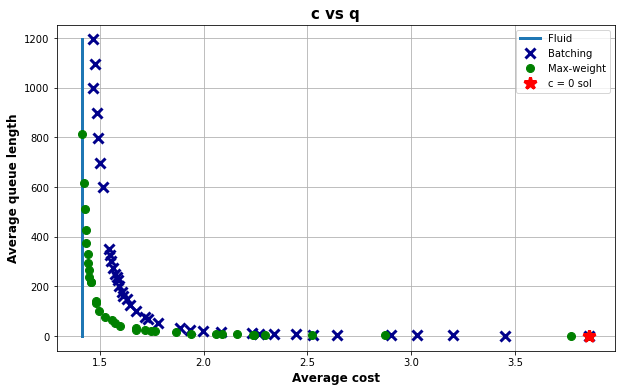

In [3]:
plot_from_sim_paths("../longest_spatial_uniform_25_all_good.pkl")

In [3]:
with open("../longest_spatial_uniform_25_all_good.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, 0)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, 0)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)

Expected cost for c = 0 case: 3.857
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

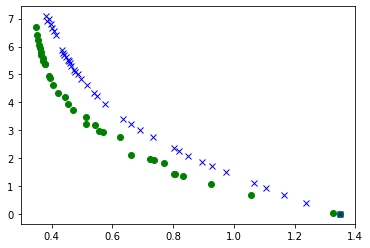

In [5]:
plt.plot(np.log(average_cost_M), np.log(average_queue_M), 'go')
plt.plot(np.log(average_cost_B), np.log(average_queue_B), 'bx')

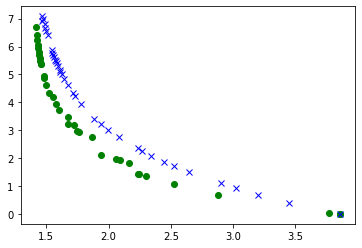

In [15]:
plt.plot(average_cost_M, np.log(average_queue_M), 'go')
plt.plot(average_cost_B, np.log(average_queue_B), 'bx')

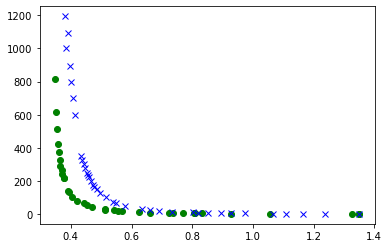

In [14]:
plt.plot(np.log(average_cost_M), (average_queue_M), 'go')
plt.plot(np.log(average_cost_B), (average_queue_B), 'bx')

In [7]:
# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_B)

# Sort x and reorder y accordingly
average_cost_B = average_cost_B[sorted_indices]
average_queue_B = average_queue_B[sorted_indices]

# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_M)

# Sort x and reorder y accordingly
average_cost_M = average_cost_M[sorted_indices]
average_queue_M = average_queue_M[sorted_indices]

[-31.53262772  17.3605827 ] [0.28169313]
[-16.84457596  13.30140714] [0.57174811]


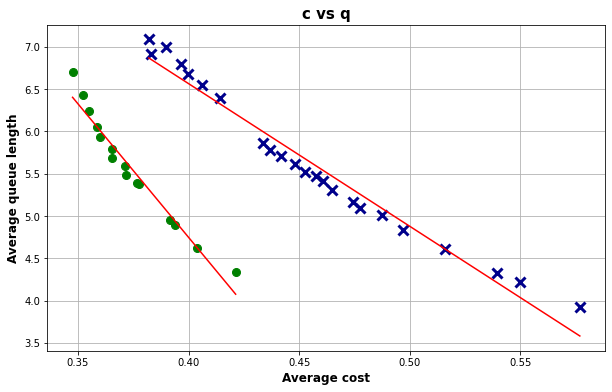

In [11]:
# Polynomial fit
deg = 1
xM = np.log(average_cost_M[:15])
yM = np.log(average_queue_M[:15])
xB = np.log(average_cost_B[:23])
yB = np.log(average_queue_B[:23])



p, res, _, _, _ = np.polyfit(xM, yM, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM, yM,'go',markersize = 8)
predict = np.poly1d(p)
x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB, yB, 1, full=True)
print(pB,resB)
predict2 = np.poly1d(pB)
x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'r')
 
 

[-3.24717555  4.2701536 ] [0.47390072]
[-4.54746011  6.00106536] [0.07725779]


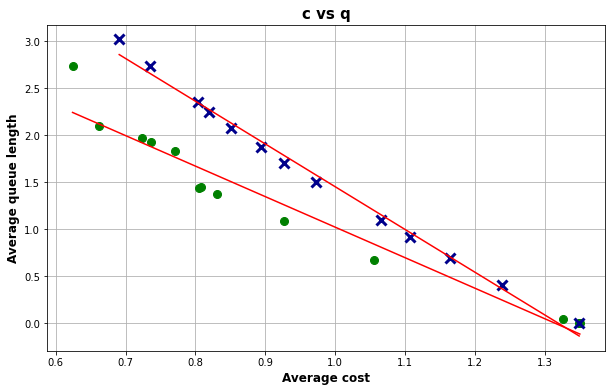

In [12]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[23:])
yM2 = np.log(average_queue_M[23:])
xB2 = np.log(average_cost_B[25:])
yB2 = np.log(average_queue_B[25:])



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'r')
 
 

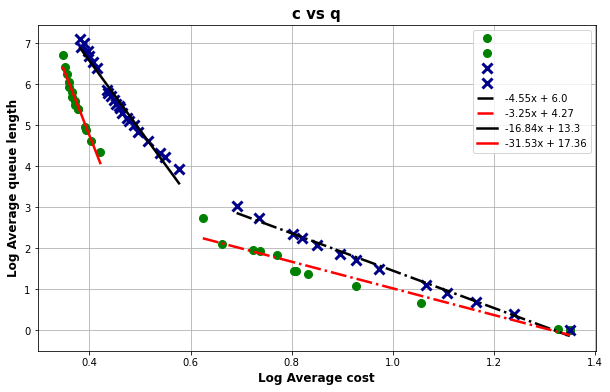

In [13]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel("Log Average queue length", weight='bold',fontsize=12)
plt.xlabel("Log Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
            str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])

In [27]:
from scipy.optimize import curve_fit
def model_func(x, a, b, c, k):
    return a + b /(x - c) + k

In [28]:
# Fit maxweight
x_data = average_cost_M
y_data = average_queue_M
initial_guess = [1, 1, 1, 1]  # Initial guess for [a, b, c, d]
popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guess)
print(pcov)

[[ 4.35819685e+18  5.20692726e+09  2.59760195e+07 -4.35819683e+18]
 [ 5.20692953e+09  2.60423023e+02  1.36177971e+00 -5.20692917e+09]
 [ 2.59760327e+07  1.36177970e+00  8.40513470e-03 -2.59760310e+07]
 [-4.35819683e+18 -5.20692661e+09 -2.59760169e+07  4.35819680e+18]]


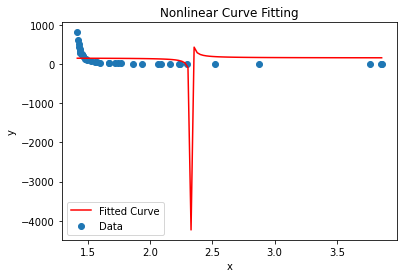

In [29]:
a_opt, b_opt, c_opt, k_opt = popt
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = model_func(x_fit, *popt)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Curve Fitting')
plt.show()

In [43]:
def model_func(x, a, b, c):
    y = np.exp(b - a*(x-c))
    return y

# Fit maxweight
x_data = average_cost_M
y_data = average_queue_M
initial_guess = [1, 1, 1]  # Initial guess for [a, b, c, d]
popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guess)
print(popt)
print(pcov)

[31.30021817 10.64304532  1.28707246]
[[ 2.58678421e+00  5.30454796e+04 -1.69472504e+03]
 [ 5.30458994e+04  8.00533914e+12 -2.55760017e+11]
 [-1.69473845e+03 -2.55760017e+11  8.17119488e+09]]


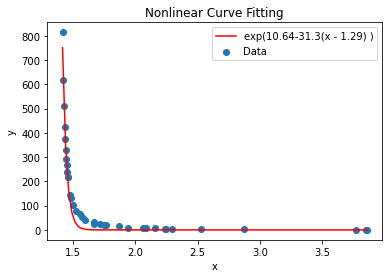

In [49]:
a_opt, b_opt, c_opt = popt
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = model_func(x_fit, *popt)
plt.scatter(x_data, y_data, label='Data')
curve = "exp(" + str(round(b_opt,2)) + "-" + str(round(a_opt,2)) + "(x - " + str(round(c_opt,2)) +") )"
plt.plot(x_fit, y_fit, 'r-', label=curve )
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Curve Fitting')
plt.show()

### Linear, High traffic, C - Cstar

In [3]:
with open("../longest_spatial_uniform_25_all_good.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)

Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_B)

# Sort x and reorder y accordingly
average_cost_B = average_cost_B[sorted_indices]
average_queue_B = average_queue_B[sorted_indices]

# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_M)

# Sort x and reorder y accordingly
average_cost_M = average_cost_M[sorted_indices]
average_queue_M = average_queue_M[sorted_indices]

In [4]:
[Ex,fluid_sol] = run_extremes(N, W, pmf_cust, pmf_serv)

Expected cost for c = 0 case: 3.857
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

[-0.98227975  2.10910554] [0.60408801]
[-1.61878878  2.47903141] [0.30512574]


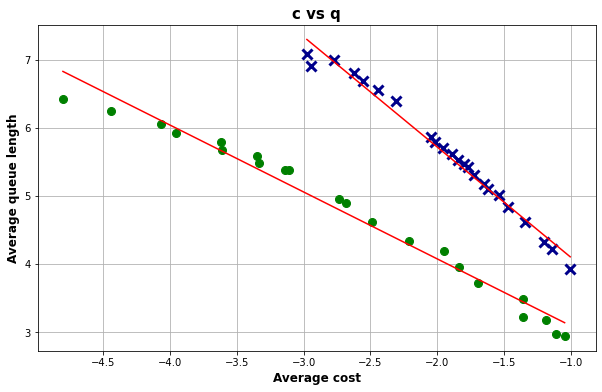

In [5]:
# Polynomial fit
deg = 1

Cstar = fluid_sol['Cost']
xM = np.log(average_cost_M[:23] - Cstar)

yM = np.log(average_queue_M[:23])


xM = np.delete(xM, [0]) # remove outlier
yM = np.delete(yM, [0]) 

xB = np.log(average_cost_B[:23] - Cstar)
yB = np.log(average_queue_B[:23])



p, res, _, _, _ = np.polyfit(xM, yM, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM, yM,'go',markersize = 8)
predict = np.poly1d(p)
x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB, yB, 1, full=True)
print(pB,resB)
predict2 = np.poly1d(pB)
x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'r')

[-1.50088396  1.28701353] [0.16792315]
[-2.10551365  1.916157  ] [0.00527912]


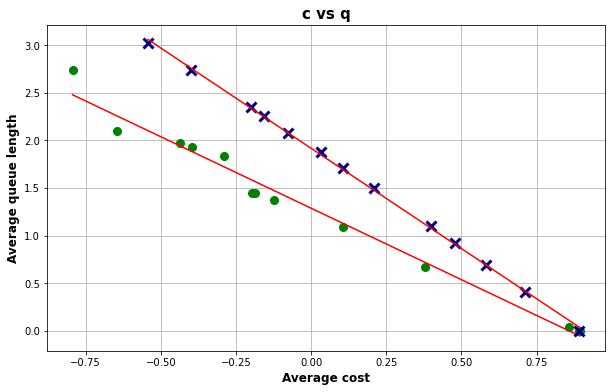

In [6]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[23:] - Cstar)
yM2 = np.log(average_queue_M[23:])




xB2 = np.log(average_cost_B[25:] - Cstar)
yB2 = np.log(average_queue_B[25:])



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'r')
 
 

In [7]:
xM2

array([-0.79348924, -0.6469666 , -0.4345829 , -0.39465625, -0.29126398,
       -0.19671122, -0.18799535, -0.12476127,  0.10480568,  0.37948162,
        0.85623835,  0.8923371 ,  0.89394279])

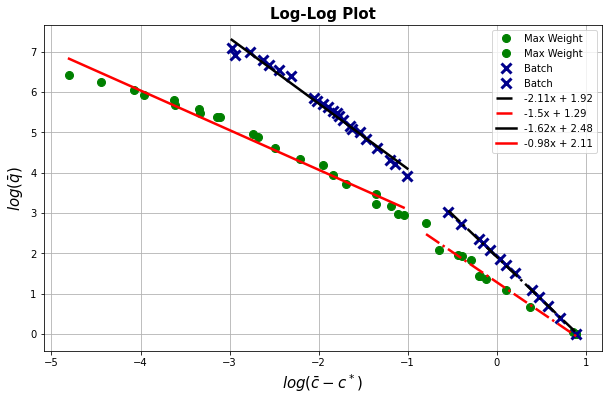

In [13]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

plt.legend(["Max Weight","Max Weight","Batch","Batch",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
            str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])

plt.savefig("../september-report-plots/spatial-5-scale-log-log-plot.jpg",bbox_inches='tight')

plt.show()

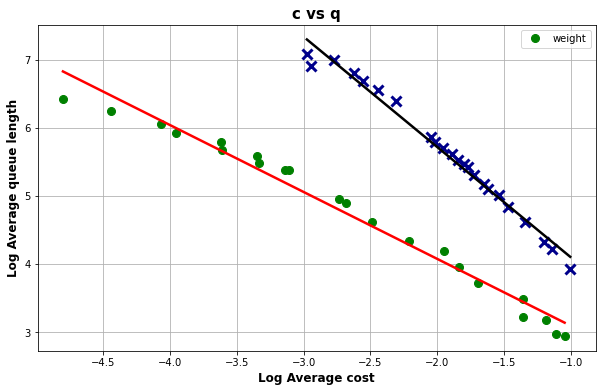

In [12]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
# plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel("Log Average queue length", weight='bold',fontsize=12)
plt.xlabel("Log Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
 #plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
#plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
#plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

# plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
#             str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])
plt.legend(["","", str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])



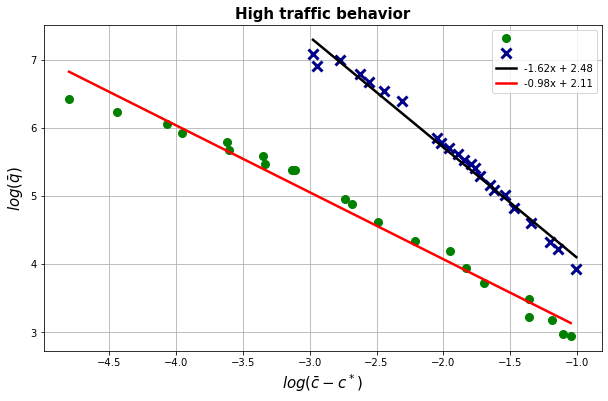

In [15]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
# plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("High traffic behavior", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
 #plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
#plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
#plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

# plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
#             str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])
plt.legend(["","", str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])
plt.savefig("../september-report-plots/spatial-5-scale-high-traffic.jpg",bbox_inches='tight')

plt.show()

In [72]:
xM

array([-4.80272068, -4.44266862, -4.06778941, -3.95545738, -3.62058387,
       -3.60824318, -3.34756286, -3.33139303, -3.13656397, -3.11225706,
       -2.73390425, -2.68068271, -2.48619296, -2.2096253 , -1.95169807,
       -1.83302559, -1.6927616 , -1.35575057, -1.35546226, -1.18810709,
       -1.10664626, -1.04559912])

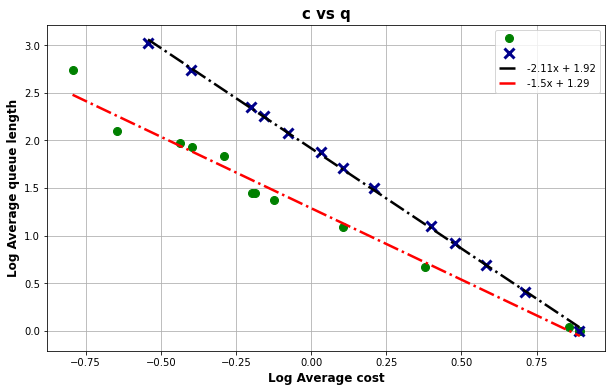

In [74]:
plt.figure( figsize=(10,6) )

# plt.plot(xM, yM,'go',markersize = 8)
plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel("Log Average queue length", weight='bold',fontsize=12)
plt.xlabel("Log Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
# plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
# plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
# plt.plot(x, y,'r', linewidth=2.5)

# plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
#             str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])
plt.legend(["","", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)), str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2))])